In [1]:
using StatsKit, Dates,VegaLite, Statistics;

In [2]:
df = CSV.read(
        "../data/2016-2022.csv", 
        select = ["year", "event_type", "sub_event_type", "longitude", "latitude", "fatalities", "location", "event_date", "admin1", "time_precision"], 
        DataFrame
    )

,event_date,year,time_precision,event_type,sub_event_type,admin1
,String31,Int64,Int64,String31,String63,String63
1,18 March 2022,2022,1,Riots,Mob violence,Uttar Pradesh
2,18 March 2022,2022,1,Protests,Peaceful protest,Maharashtra
3,18 March 2022,2022,1,Protests,Peaceful protest,Punjab
4,18 March 2022,2022,1,Protests,Peaceful protest,Madhya Pradesh
5,18 March 2022,2022,1,Riots,Mob violence,Madhya Pradesh
6,18 March 2022,2022,1,Riots,Mob violence,Madhya Pradesh
7,18 March 2022,2022,2,Protests,Peaceful protest,Telangana
8,18 March 2022,2022,2,Protests,Peaceful protest,Telangana
9,18 March 2022,2022,2,Protests,Peaceful protest,Telangana


In [144]:
function date_conversion!(df::DataFrame, kind::String)
    dates = df.event_date
    dates = Dates.Date.(dates, dateformat"d U y")
    if kind == "month"
        months = Dates.monthname.(dates)
        df[!,"month"] = months
    elseif kind == "day_of_week"
        days_of_week = Dates.dayname.(dates)
        df[!,"DayOfWeek"] = days_of_week
    elseif kind == "day"
        days = Dates.day.(dates)
        df[!,"day"] = days
    else
        throw(ArgumentError(kind, "kind must be either \"month\", \"day_of_week\", or \"dat\". "))
    end
    return df 
end


date_conversion! (generic function with 1 method)

In [145]:
date_conversion!(df,"month");

In [146]:
date_conversion!(df,"day_of_week");


In [147]:
date_conversion!(df,"day");

In [148]:
function filter_data(data::DataFrame, param::Symbol, value::Symbol)
    df = subset(data, param => x -> x .== value)
    return df
end

filter_data (generic function with 2 methods)

In [149]:
function by_day(data::DataFrame, day::Int, month::String)
    data = filter_data(data,:day,day)
    data = filter_data(data,:month,month)
    plot = @vlplot(
    :bar,
    title =  string(data.day[1])*" "*string(data.month[1]),
    x = {data.year, type = :ordinal, title = "Years"},
    y = {"count()", title = "Protests' amount"}
)
    return data, plot
end;

In [150]:
#Dzień republiki
df_26_01, plot_26_01 = by_day(df, 26, "January");

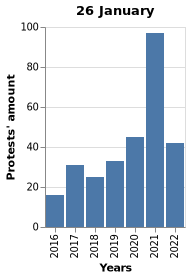

In [151]:
plot_26_01

In [152]:
df_15_08, plot_15_08 = by_day(df,15, "August");

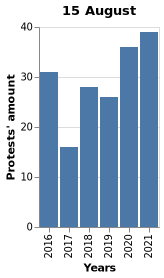

In [153]:
plot_15_08

In [154]:
df_02_10, plot_02_10 = by_day(df, 2, "October");

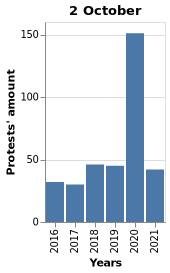

In [155]:
plot_02_10

In [156]:
function by_month(data::DataFrame, month::String)
	data_2 = filter_data(data,:month,month)
    plot = @vlplot(
	:bar,
    title =  string(data_2.month[1]),
	x = {data_2.year, type = :ordinal, title = "Years"},
	y = {"count()", title = "Protests' amount"}
)
    return plot
end;

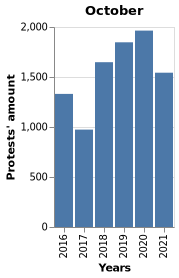

In [157]:
by_month(df, "October")

In [158]:
holidays_set = ["26 January 2016","26 January 2017","26 January 2018","26 January 2019","26 January 2020","26 January 2021",
        "26 January 2022","15 August 2016","15 August 2017","15 August 2018","15 August 2019","15 August 2020","15 August 2021",
        "02 October 2019","02 October 2016","02 October 2017","02 October 2018","02 October 2020","02 October 2021",
        "11 March 2021","29 March 2021","21 April 2021","25 April 2021","26 May 2021","19 July 2021","12 August 2021",
        "30 August 2021","15 October 2021","18 November 2021","04 November 2021","21 February 2020","10 March 2020",
        "02 April 2020","06 April 2020","07 May 2020","30 July 2020","18 September 2020","30 August 2020","25 October 2020",
        "14 November 2020","30 November 2020","04 March 2019", "21 March 2019","14 April 2019","17 April 2019","18 May 2019",
        "11 August 2019","24 August 2019","31 August 2019","08 October 2019","27 October 2019","12 November 2019",
        "13 February 2018","02 March 2018","25 March 2018","29 March 2018","30 April 2018","22 August 2018","21 September 2018",
        "03 August 2018","19 October 2018", "07 November 2018","23 November 2018","24 February 2017","13 March 2017",
        "04 April 2017","09 April 2017","10 May 2017","02 September 2017","21 September 2017","14 August 2017","30 August 2017",
        "19 October 2017","04 November 2017","07 March 2016", "24 March 2016","15 April 2016","19 April 2016","21 May 2016",
        "13 September 2016","12 October 2016","25 August 2016","11 October 2016","30 October 2016","14 November 2016"];

In [159]:
typeof(holidays_set)

Vector{String} (alias for Array{String, 1})

In [160]:
length(holidays_set)

85

In [161]:
function holiday(df::DataFrame, dates::Vector{String})
    holy = []
    for i in df.event_date
        if i in dates
            push!(holy, true)
        else
            push!(holy, false)
        end
    end
    df[!,"Holiday"] = holy
    return df
end

holiday (generic function with 2 methods)

In [162]:
df = holiday(df, holidays_set);

In [163]:
countmap(df.Holiday)

Dict{Any, Int64} with 2 entries:
  false => 104353
  true  => 3337

In [164]:
function month_celebrations(df, year, month)
    df = filter_data(df, :year, year)
    df = filter_data(df, :month, month)
    plot = @vlplot(
    :bar, 
    width = 600,
    x = {df.day, title = "Days"},
    y = {"count()", title = "Number of protests"},
    color = {df.Holiday, legend = false},
    title = month*" in "*string(year),
    )
    return plot
end


month_celebrations (generic function with 1 method)

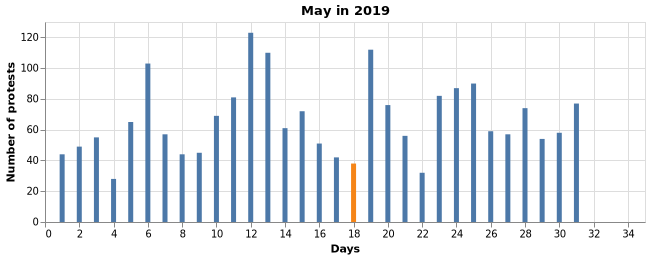

In [165]:
plotx = month_celebrations(df, 2019, "May")

In [166]:
function radius_of_days(df::DataFrame, date::String, R::Int)
    dates = df.event_date
    dates = Dates.Date.(dates, dateformat"d U y")
    df[!,"formal_date"] = dates
    my_date = Dates.Date.(date, dateformat"d U y")
    radiuses = []
    max = 0
    this_r = 0
    for r in range(-R,R)
        the_day = my_date + Dates.Day(r)
        df_f = filter_data(df,:formal_date, the_day)
        n = nrow(df_f)
        push!(radiuses, (n,r))
        if n > max
            max = n
            this_r = r
        end
    end
    return this_r
end


radius_of_days (generic function with 1 method)

In [167]:
r_of_29_03_2021 = radius_of_days(df, "26 January 2021", 2)

0

In [168]:
r_average_list = []
for holiday in holidays_set
    r_of_all = radius_of_days(df, holiday, 2)
    push!(r_average_list,r_of_all)
end
print(r_average_list)
mean(r_average_list)

Any[1, -2, -2, 2, 2, 0, 2, 2, 2, -2, -2, 2, 2, -2, 2, 1, 2, 0, 2, -1, -2, -2, 1, 0, -1, -2, -2, -2, 0, -2, 2, 1, -2, -2, -1, -2, 2, 1, 2, -2, 1, 2, -1, 1, 1, 1, -2, 2, -1, 2, 1, 1, -2, -2, 1, -1, 0, -2, -2, -2, 0, 2, -1, -1, 0, -1, 2, -2, -2, 1, 2, 1, -2, 2, -2, 2, 0, -1, -1, -1, 1, 1, 2, 2, 2]

0.023529411764705882

In [169]:
countmap(r_average_list)

Dict{Any, Int64} with 5 entries:
  0  => 8
  2  => 24
  -1 => 12
  -2 => 25
  1  => 16

TIME PRECISION RESEARCH


In [170]:
countmap(df.time_precision)

Dict{Int64, Int64} with 3 entries:
  2 => 3913
  3 => 230
  1 => 103547

In [171]:
df_2019 = filter_data(df,:year, 2019)

,event_date,year,time_precision,event_type,sub_event_type
,String31,Int64,Int64,String31,String63
1,31 December 2019,2019,1,Protests,Peaceful protest
2,31 December 2019,2019,1,Protests,Peaceful protest
3,31 December 2019,2019,1,Protests,Peaceful protest
4,31 December 2019,2019,1,Protests,Peaceful protest
5,31 December 2019,2019,1,Protests,Peaceful protest
6,31 December 2019,2019,1,Protests,Peaceful protest
7,31 December 2019,2019,1,Protests,Peaceful protest
8,31 December 2019,2019,1,Protests,Peaceful protest
9,31 December 2019,2019,1,Protests,Peaceful protest


In [178]:
function srednia_tp(data, month)
    data = filter_data(data,:month,month)
    data = groupby(data, :day)
    data = combine(data, nrow, :time_precision .=> mean, :month)
    return data
end

srednia_tp (generic function with 1 method)

In [179]:
df_2019_tp = srednia_tp(df_2019,"October")

,day,nrow,time_precision_mean,month
,Int64,Int64,Float64,String
1,1,45,1.06667,October
2,1,45,1.06667,October
3,1,45,1.06667,October
4,1,45,1.06667,October
5,1,45,1.06667,October
6,1,45,1.06667,October
7,1,45,1.06667,October
8,1,45,1.06667,October
9,1,45,1.06667,October


In [174]:
ismissing(df_2019_tp)

false

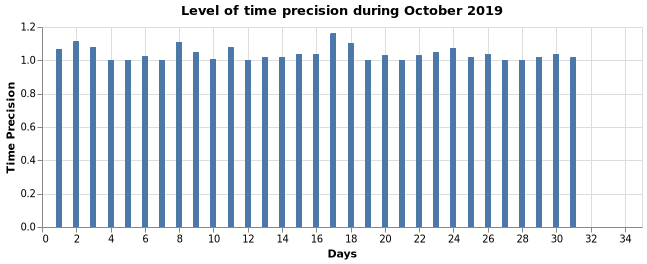

In [185]:
@vlplot(
    :bar, 
    width = 600,
    x = {df_2019_tp.day, title = "Days"},
    y = {df_2019_tp.time_precision_mean, title = "Time Precision"},
    title = "Level of time precision during " *(df_2019_tp.month[1])*" "*string(df_2019.year[1]),
)

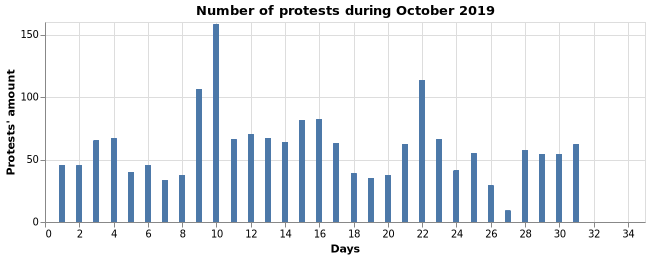

In [186]:
@vlplot(
    :bar, 
    width = 600,
    x = {df_2019_tp.day, title = "Days"},
    y = {df_2019_tp.nrow, title = "Protests' amount"},
    title = "Number of protests during " *(df_2019_tp.month[1])*" " *string(df_2019.year[1]),
)